In [1]:
## Clone Deep Learning Utils Repo
!git clone https://github.com/shivam13juna/eva8_utils.git

fatal: destination path 'eva8_utils' already exists and is not an empty directory.


In [2]:
import pyrootutils
import sys

root = pyrootutils.setup_root(
    search_from=sys.path[0],
    pythonpath=True,
    cwd=True,
)

import torch
from core_utils import main
from core_utils.utils import data_handling, train, test, gradcam, helpers, augmentation
from core_utils.models import resnet
from pprint import pprint


import timm
import urllib
import torch
import os
import numpy as np

import torchvision.transforms as T
import torch.nn.functional as F

from PIL import Image

from matplotlib.colors import LinearSegmentedColormap

import matplotlib.pyplot as plt

/home/shivam13juna/Documents/virtual_envs/mlo/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Import Config

In [3]:
config_file_path = "core_utils/config/config.yaml"

config = helpers.load_config_variables(config_file_path)

 Loading config ..
 Config succesfully loaded 


## Perform GPU Check; Create "Device"

In [4]:
device, cuda = helpers.gpu_check(seed_value = 1)
pprint(device)

CUDA is available
device(type='cuda')


## Download Dataset, Create Data Loaders

In [5]:
mean, std = data_handling.return_dataset_statistics()
trainloader, testloader = main.create_dataloaders(mean, std, cuda, config, augment_func = "albumentation_augmentation")

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


## Model Summary

In [6]:
from torchsummary import summary
model = resnet.ResNet18("layer").to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
         GroupNorm-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
         GroupNorm-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
         GroupNorm-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
         GroupNorm-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
        GroupNorm-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
        GroupNorm-14          [-1, 128,

## Trigger Training

In [7]:
train_acc, train_losses, test_acc, test_losses, lrs = main.start_training(model, device, trainloader, testloader, config, optimizer_name = "Adam", scheduler_name = "ReduceLROnPlateau", criterion_name = "CrossEntropyLoss", lambda_l1 = 0, epochs = 20)

EPOCH: 1


Loss=1.9502782821655273 Batch_id=390 LR=0.01000 Accuracy=17.76: 100%|██████████| 391/391 [00:44<00:00,  8.82it/s]



Test set: Average loss: 0.0150, Accuracy: 3164/10000 (31.64%)

EPOCH: 2


Loss=1.5989505052566528 Batch_id=390 LR=0.01000 Accuracy=33.51: 100%|██████████| 391/391 [02:09<00:00,  3.03it/s]



Test set: Average loss: 0.0126, Accuracy: 4124/10000 (41.24%)

EPOCH: 3


Loss=1.5378726720809937 Batch_id=390 LR=0.01000 Accuracy=42.66: 100%|██████████| 391/391 [02:32<00:00,  2.56it/s]



Test set: Average loss: 0.0105, Accuracy: 5148/10000 (51.48%)

EPOCH: 4


Loss=1.3215409517288208 Batch_id=390 LR=0.01000 Accuracy=49.94: 100%|██████████| 391/391 [02:32<00:00,  2.56it/s]



Test set: Average loss: 0.0092, Accuracy: 5797/10000 (57.97%)

EPOCH: 5


Loss=1.1290209293365479 Batch_id=390 LR=0.01000 Accuracy=55.20: 100%|██████████| 391/391 [02:38<00:00,  2.46it/s]



Test set: Average loss: 0.0082, Accuracy: 6313/10000 (63.13%)

EPOCH: 6


Loss=0.985277533531189 Batch_id=390 LR=0.01000 Accuracy=59.13: 100%|██████████| 391/391 [02:44<00:00,  2.37it/s] 



Test set: Average loss: 0.0074, Accuracy: 6603/10000 (66.03%)

EPOCH: 7


Loss=0.7551771402359009 Batch_id=390 LR=0.01000 Accuracy=62.58: 100%|██████████| 391/391 [02:53<00:00,  2.26it/s]



Test set: Average loss: 0.0078, Accuracy: 6647/10000 (66.47%)

EPOCH: 8


Loss=0.9769164323806763 Batch_id=390 LR=0.01000 Accuracy=64.37: 100%|██████████| 391/391 [02:50<00:00,  2.29it/s]



Test set: Average loss: 0.0066, Accuracy: 7089/10000 (70.89%)

EPOCH: 9


Loss=0.8652579188346863 Batch_id=390 LR=0.01000 Accuracy=66.80: 100%|██████████| 391/391 [02:56<00:00,  2.22it/s]



Test set: Average loss: 0.0063, Accuracy: 7231/10000 (72.31%)

EPOCH: 10


Loss=0.8074614405632019 Batch_id=390 LR=0.01000 Accuracy=68.14: 100%|██████████| 391/391 [02:55<00:00,  2.22it/s]



Test set: Average loss: 0.0058, Accuracy: 7371/10000 (73.71%)

EPOCH: 11


Loss=0.9762449264526367 Batch_id=390 LR=0.01000 Accuracy=68.92: 100%|██████████| 391/391 [02:58<00:00,  2.19it/s]



Test set: Average loss: 0.0057, Accuracy: 7486/10000 (74.86%)

EPOCH: 12


Loss=0.8410900831222534 Batch_id=390 LR=0.01000 Accuracy=70.16: 100%|██████████| 391/391 [03:04<00:00,  2.12it/s]



Test set: Average loss: 0.0055, Accuracy: 7556/10000 (75.56%)

EPOCH: 13


Loss=0.9212039113044739 Batch_id=390 LR=0.01000 Accuracy=71.57: 100%|██████████| 391/391 [02:58<00:00,  2.19it/s]



Test set: Average loss: 0.0056, Accuracy: 7549/10000 (75.49%)

EPOCH: 14


Loss=0.8578271865844727 Batch_id=390 LR=0.01000 Accuracy=72.49: 100%|██████████| 391/391 [02:59<00:00,  2.18it/s]



Test set: Average loss: 0.0052, Accuracy: 7729/10000 (77.29%)

EPOCH: 15


Loss=0.7902153730392456 Batch_id=390 LR=0.01000 Accuracy=72.99: 100%|██████████| 391/391 [02:58<00:00,  2.19it/s]



Test set: Average loss: 0.0049, Accuracy: 7802/10000 (78.02%)

EPOCH: 16


Loss=0.591128408908844 Batch_id=390 LR=0.01000 Accuracy=73.80: 100%|██████████| 391/391 [02:57<00:00,  2.20it/s] 



Test set: Average loss: 0.0050, Accuracy: 7787/10000 (77.87%)

EPOCH: 17


Loss=0.73586505651474 Batch_id=390 LR=0.01000 Accuracy=74.13: 100%|██████████| 391/391 [02:57<00:00,  2.21it/s]  



Test set: Average loss: 0.0049, Accuracy: 7836/10000 (78.36%)

EPOCH: 18


Loss=0.8781765699386597 Batch_id=390 LR=0.01000 Accuracy=74.68: 100%|██████████| 391/391 [02:58<00:00,  2.18it/s]



Test set: Average loss: 0.0048, Accuracy: 7875/10000 (78.75%)

EPOCH: 19


Loss=0.4709815979003906 Batch_id=390 LR=0.01000 Accuracy=75.00: 100%|██████████| 391/391 [02:59<00:00,  2.18it/s]



Test set: Average loss: 0.0046, Accuracy: 8035/10000 (80.35%)

EPOCH: 20


Loss=0.7302289605140686 Batch_id=390 LR=0.01000 Accuracy=75.70: 100%|██████████| 391/391 [02:59<00:00,  2.18it/s] 



Test set: Average loss: 0.0047, Accuracy: 7951/10000 (79.51%)



## Plot Metrics

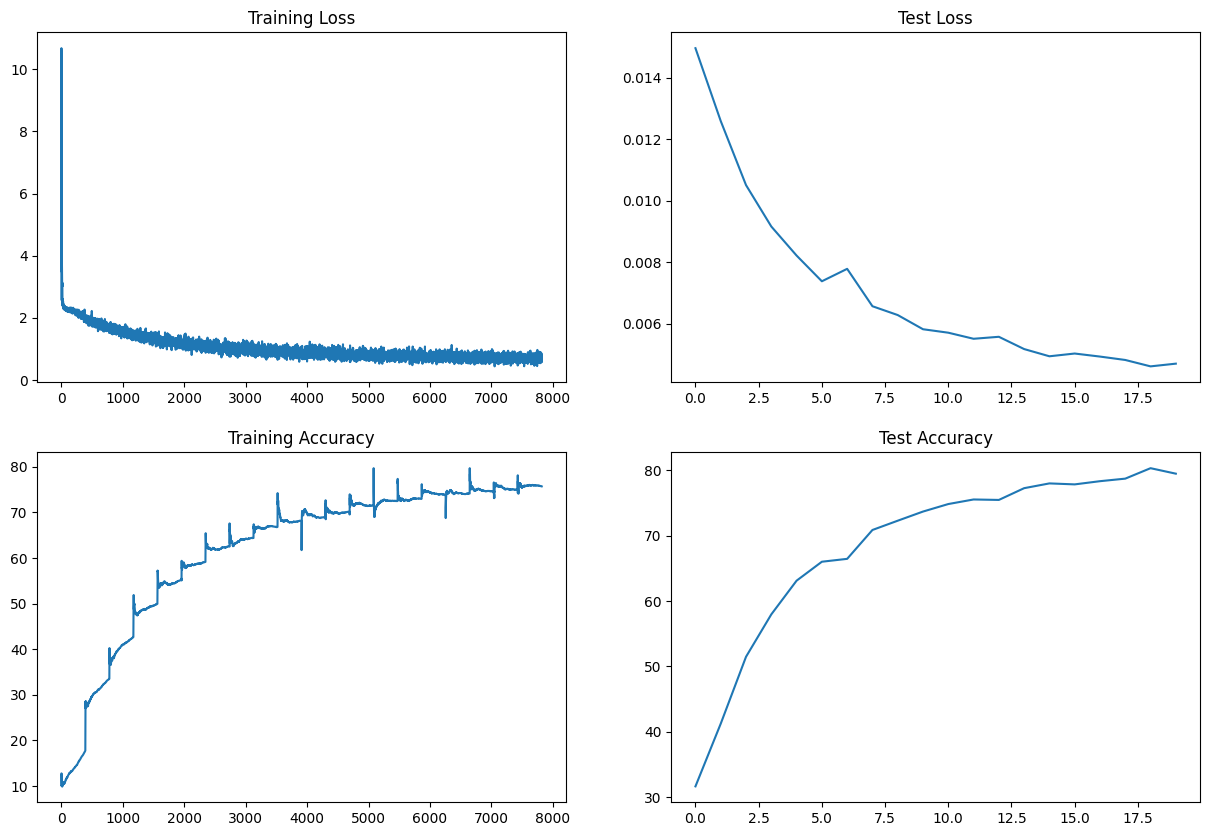

In [8]:
helpers.plot_metrics(train_acc, train_losses, test_acc, test_losses)

## Misclassified Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total wrong predictions are 2049


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


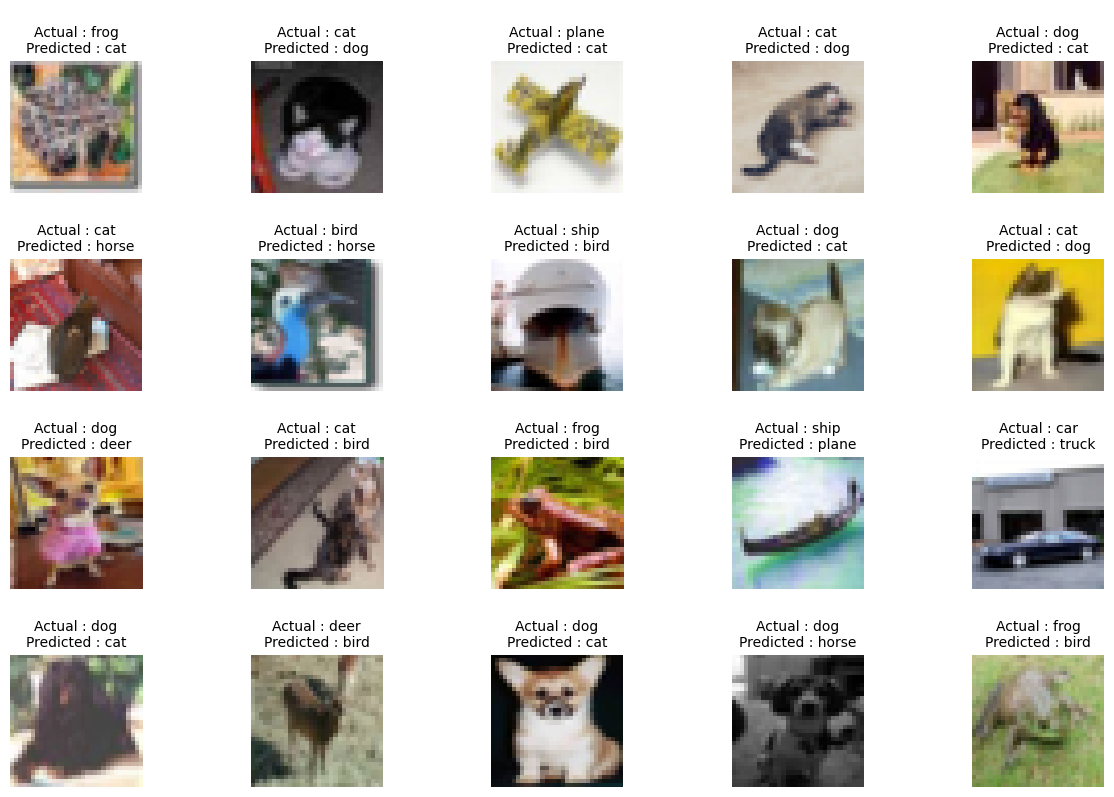

In [9]:
misclassified_images = helpers.wrong_predictions(model, testloader, device)
helpers.plot_misclassified(misclassified_images, mean, std, 20)

## Gradcam

In [10]:
# cifar 10 labels in a dictionary

cifar10_labels = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}


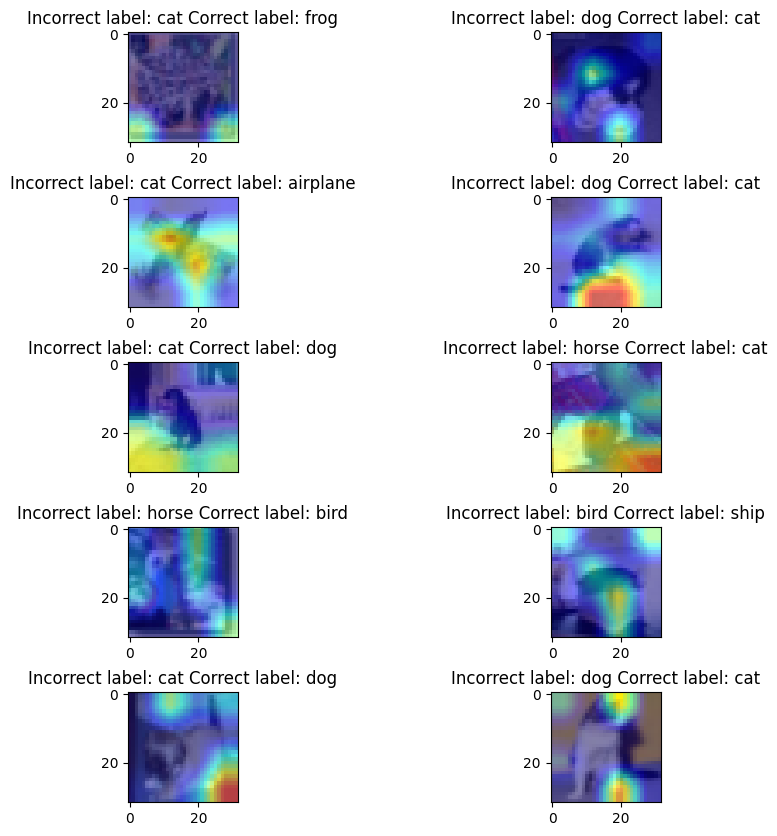

In [11]:
from core_utils.utils import gradcam

gradcam.plot_gradcam_images(model, [model.layer4[-1]], misclassified_images[:10], list(range(10)), cifar10_labels)
    